In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.decomposition import PCA
#from dask_ml.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
#from pca import pca
import dask.array as da
import matplotlib

path_root = r"C:\Users\cahernandez\Desktop\AGD\Proyectos\Proyecto Prediccion_perdidas_silos_australianos"
os.chdir(path_root)

### 1) Apertura de la base de datos

In [2]:
df = pd.read_csv(r"resultados/tabla_concatenada_v5.csv",header=0)

In [3]:
df.columns

Index(['ID', 'fecha_muestra_alma', 'doy_muestra_alma', 'ubicacion_alma',
       'temp_grano_alma', 'hum_grano_alma', 'temp_amb_alma', 'hum_amb_alma',
       'fecha_extraccion', 'doy_extraccion', 'hum_grano_extraccion',
       'temp_grano_extraccion', 'cuerpo_extranio_extraccion',
       'daniado_extraccion', 'pista', 'fecha_llenado', 'DOY_llenado',
       'hum_grano_llenado', 'temp_grano_llenado', 'hum_amb_llenado',
       'temp_amb_muestra', 'cuerpo_extranio_llenado', 'daniado_llenado',
       'posicion', 'tiempo_llenado_extraccion', 'DEW_amb_alma', 'lona',
       'tiempo_llenado_muestra_alma', 'x', 'y'],
      dtype='object')

In [4]:
df_all_var = df[['temp_grano_llenado','tiempo_llenado_muestra_alma','hum_grano_alma',
       'temp_amb_alma','hum_amb_alma','hum_grano_extraccion','temp_grano_extraccion',
       'cuerpo_extranio_extraccion','daniado_extraccion','hum_grano_llenado',
       'hum_amb_llenado','temp_amb_muestra','cuerpo_extranio_llenado','daniado_llenado','posicion',
       'tiempo_llenado_extraccion','DEW_amb_alma','lona','temp_grano_alma']]

### 2) Selección de variables

In [5]:
#X = df.iloc[:, 0:4].values
X = df[['temp_grano_llenado','tiempo_llenado_muestra_alma','hum_grano_alma',
       'temp_amb_alma','hum_amb_alma','hum_grano_extraccion','temp_grano_extraccion',
       'cuerpo_extranio_extraccion','daniado_extraccion','hum_grano_llenado',
       'hum_amb_llenado','temp_amb_muestra','cuerpo_extranio_llenado','daniado_llenado','posicion',
       'tiempo_llenado_extraccion','DEW_amb_alma','lona']]

In [6]:
y = df['temp_grano_alma'].values

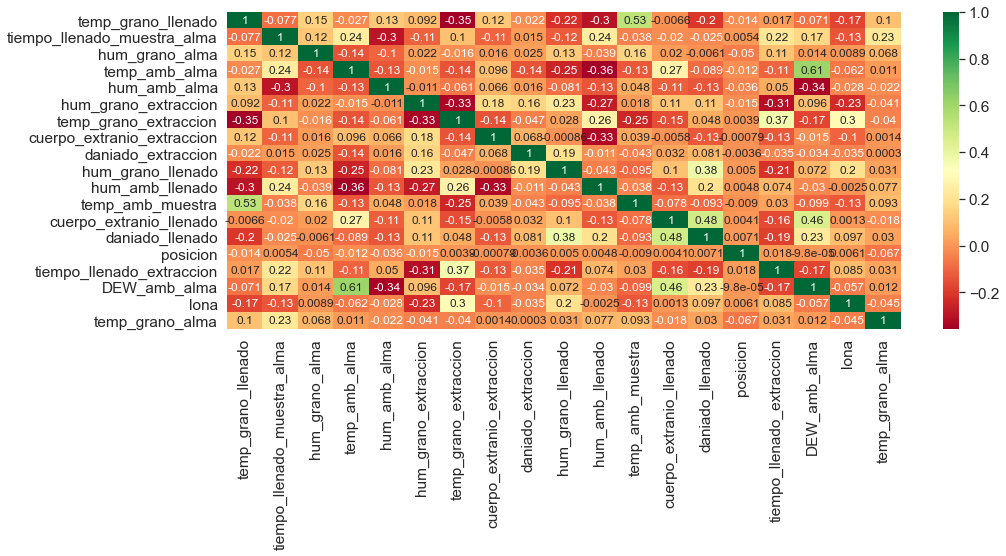

In [32]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(18, 11)
"""
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.1  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.2  # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = 0.2  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
"""
plt.subplots_adjust(left=0.25, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.5)

sns.set(font_scale=1.4)
ax = sns.heatmap(df_all_var.corr(), annot = True, cmap = 'RdYlGn', annot_kws={"fontsize":12})
plt.savefig('matriz_correlacion.jpeg', dpi=100)
plt.show()

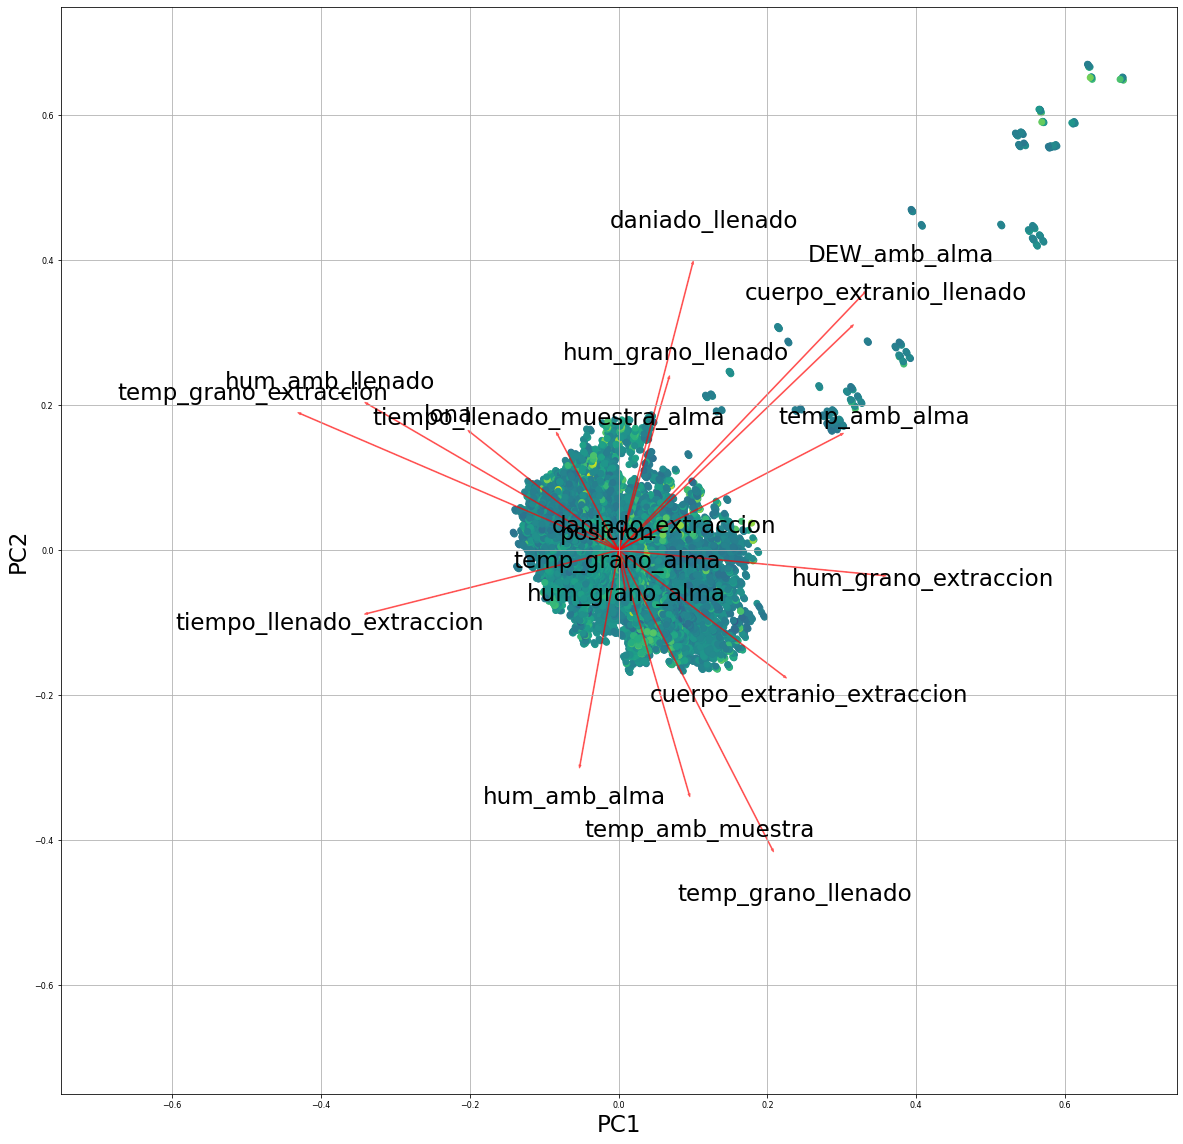

In [176]:
def myplot(score,coeff,labels=None):
    """
    Author: Serafeim Loukas, EPFL, serafeim.loukas(at)epfl.ch, Last modified: 10/2017
    Input
    ------
    score: the scores (projected data onto the forst 2 components)
    coeff: the loadings (eigenvectors)
    
    Output
    ------
    plotting of the biplot
    """
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
#plt.figure(figsize=(20,10))
matplotlib.rc('figure', figsize=(20, 20))
plt.rcParams.update({'font.size': 23})
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))


scaler = StandardScaler()
scaler.fit(df_all_var)
X=scaler.transform(df_all_var)    
pca = PCA()
x_new = pca.fit_transform(X)
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),labels=df_all_var.columns)
plt.grid()
plt.savefig('biplot.jpeg', dpi=100)
plt.show()

### 3) testeo de modelos

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from RegscorePy import aic,bic
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### 3.1) Random Forest

In [42]:
from sklearn.model_selection import learning_curve,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import make_scorer
param_grid = { 
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [990, 1000, 1010]
}

def mae(y_test, y_pred_rf):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    return mae
    


mse = make_scorer(metrics.mean_absolute_error,greater_is_better=False)

CV_rfc = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
                      scoring=mse, n_jobs = -1)


CV_rfc.fit(X_train, y_train)

print(CV_rfc.best_params_) 
#{'max_depth': 10, 'n_estimators': 100}



clf_RF = RandomForestRegressor(n_estimators=20, random_state=0)
clf_RF.fit(X_train, y_train)
y_pred_rf = clf_RF.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R2 score:', metrics.r2_score(y_test, y_pred_rf))
print('AIC:', aic.aic(y_test, y_pred_rf, X.shape[1]))
print('BIC:', bic.bic(y_test, y_pred_rf, X.shape[1]))


{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Absolute Error: 1.273620478234212
Mean Squared Error: 3.379632893930104
Root Mean Squared Error: 1.838377788684933
R2 score: 0.6675092789814472
AIC: 7980.712510380585
BIC: 8102.8108837279215


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
import pandas as pd
feat_impo = regressor.feature_importances_
feature_imp = pd.Series(regressor.feature_importances_,index=df_all_var.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

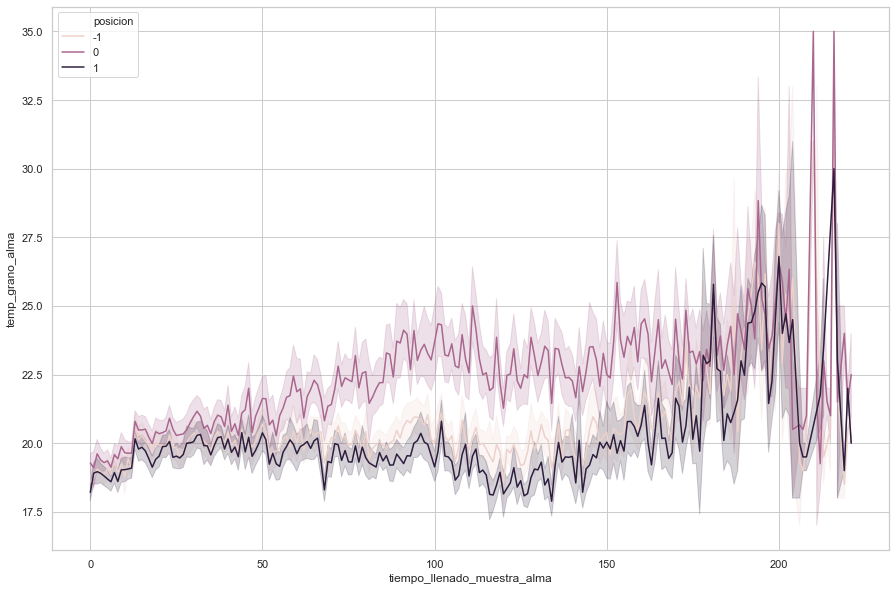

In [26]:
sns.set(style="whitegrid")
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x="tiempo_llenado_muestra_alma", y="temp_grano_alma",ax=ax,ci=95, 
             hue='posicion',data=df_all_var)

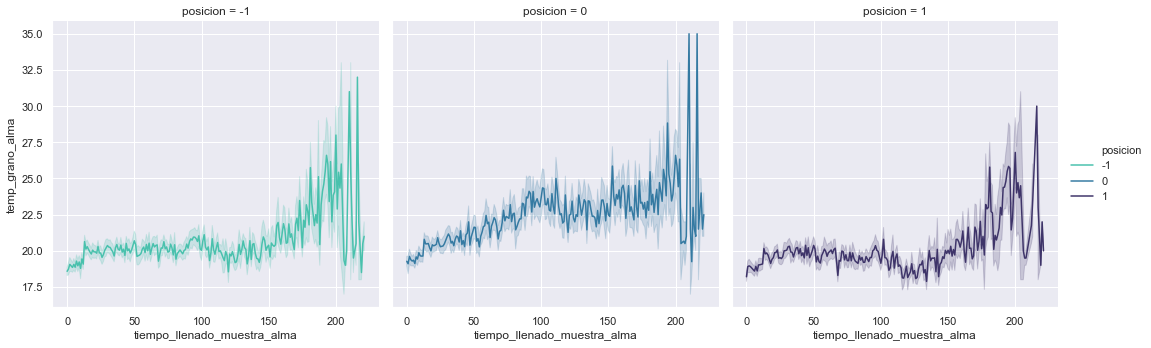

In [45]:
palette = sns.color_palette("mako_r", 3)
sns.set(style="darkgrid")
sns.relplot(
    data=df_all_var, x="tiempo_llenado_muestra_alma", y="temp_grano_alma",
    col="posicion",hue="posicion",palette=palette,
    kind="line"
)

C:\Users\cahernandez\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

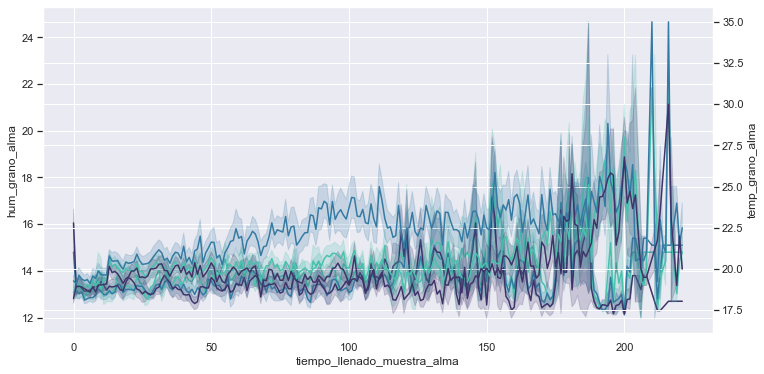

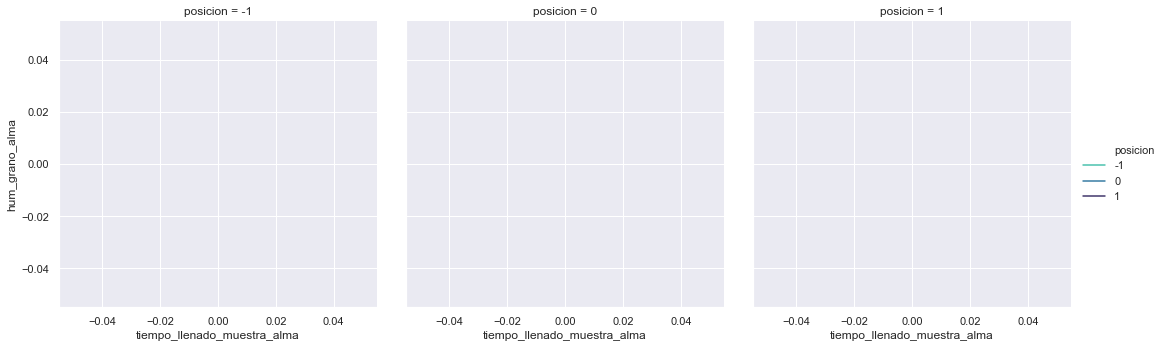

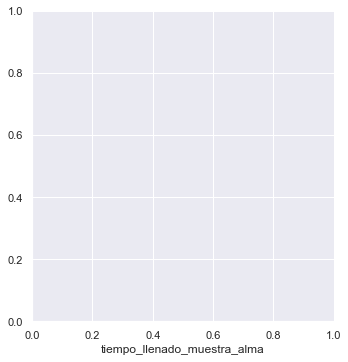

In [44]:
palette = sns.color_palette("mako_r", 3)
sns.set(style="darkgrid")
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
sns.relplot(
    data=df_all_var, x="tiempo_llenado_muestra_alma", y="hum_grano_alma",
    col="posicion",hue="posicion",palette=palette,
    kind="line", ax=ax1,
)

sns.relplot(
    data=df_all_var, x="tiempo_llenado_muestra_alma", y=df_all_var.temp_grano_alma,
    hue="posicion",palette=palette,
    kind="line", ax=ax2,
)

AttributeError: 'FacetGrid' object has no attribute 'twinx'

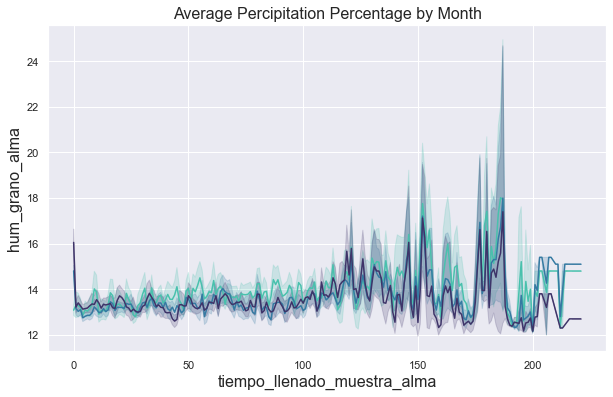

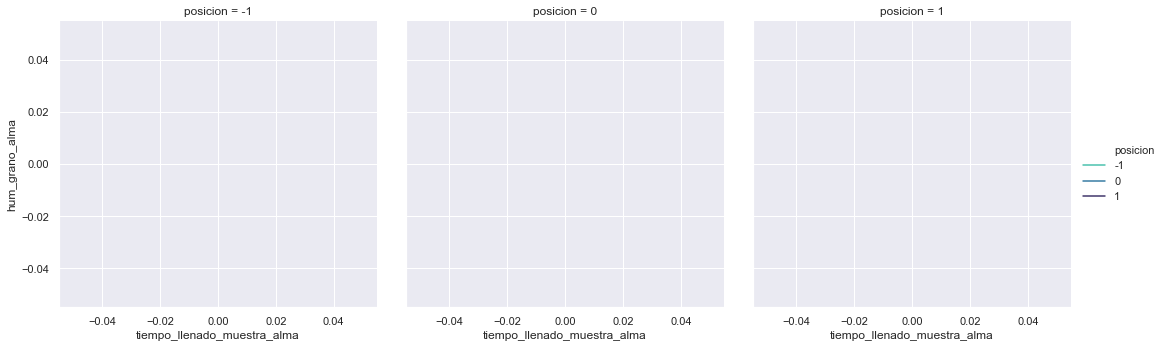

In [43]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Average Percipitation Percentage by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16)
ax1 = sns.relplot(
    data=df_all_var, x="tiempo_llenado_muestra_alma", y="hum_grano_alma",
    col="posicion",hue="posicion",palette=palette,
    kind="line", ax=ax1,
)
#ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Avg Percipitation %', fontsize=16)
ax2 = sns.relplot(
    data=df_all_var, x="tiempo_llenado_muestra_alma", y=df_all_var.temp_grano_alma,
    hue="posicion",palette=palette,
    kind="line", ax=ax2,
)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()